In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *

from uncertainties import ufloat
from uncertainties import umath
sns.set_theme(style="darkgrid")
sns.set_context("paper")

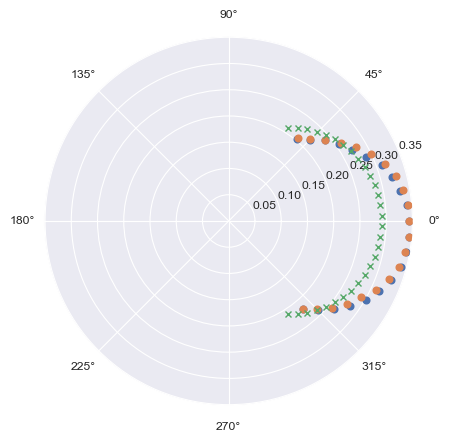

In [9]:
plt.axes(projection='polar')

df=pd.read_csv("LambertschesGesetz.csv")
rads = df["Winkel"]*2*np.pi/360

plt.polar(rads, df["Spannung 1"], "o") 
plt.polar(rads, df["Spannung 2"], "o")
sigma=5.6704E-8 #W/m^4/K^2
T=360+273.15

plt.polar(np.linspace(-1, 1, 30), 0.115+np.ones(30)*sigma*T**4/4/0.115**2*0.032**2*np.cos(np.linspace(-1, 1, 30))/1000, "x")
plt.show()

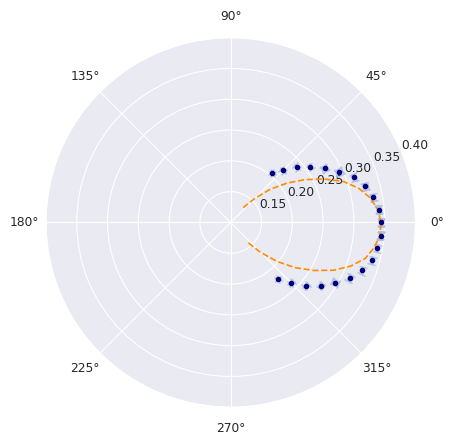

In [31]:
theta = df['Winkel'] * np.pi/180
e_theta = np.sqrt(2) * np.pi/180
r = (df['Spannung 1'] + df['Spannung 2'])/2
e_r = np.maximum(abs(df['Spannung 1'] - r), abs(df['Spannung 2'] - r))

plt.axes(projection='polar')
plt.errorbar(theta, r, xerr= e_theta, yerr=e_r, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")
plt.plot(theta, r*np.cos(theta), color = 'darkorange', ls = '--')
plt.ylim((0.1, 0.4))
plt.show()

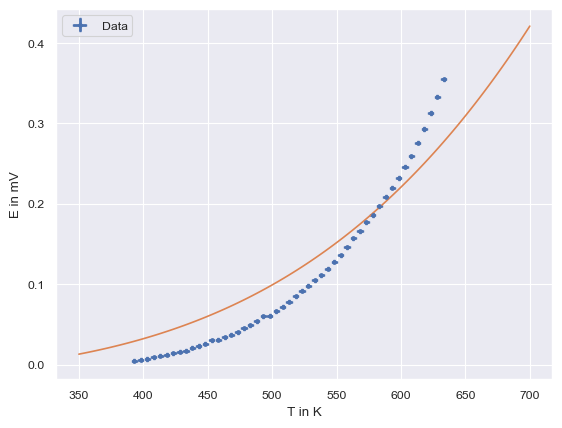

(1.81+/-0.06)e-12


In [62]:
df=pd.read_csv("EmittiereteStrahlung.csv")
temp=[]
spannung=[]
for i in range(len(df["Temperatur"])):
    temp.append(ufloat(df["Temperatur"][i]+273.15, 2))
temp=np.array(temp)
for i in range(len(df["Spannung"])):
    spannung.append(ufloat(df["Spannung"][i], 0.002))
spannung=np.array(spannung)

plt.errorbar([temp[i].n for i in range(len(temp))], [spannung[i].n for i in range(len(spannung))],
             yerr=[spannung[i].s for i in range(len(spannung))] , xerr=[temp[i].s for i in range(len(temp))],
             label="Data", fmt=".", capsize=1, elinewidth=2)


from scipy.optimize import curve_fit
def function(T, a):
    return a*(T**4-298**4) #raumtemperatur abziehen
popt, pcov=curve_fit(function, [temp[i].n for i in range(len(temp))], [spannung[i].n for i in range(len(spannung))],
                     sigma=[spannung[i].s for i in range(len(spannung))], p0=[sigma])
a=ufloat(popt[0], np.sqrt(pcov))
plt.plot(np.linspace(350, 700, 100), function(np.linspace(350, 700, 100), popt[0]))
#model_cold = np.poly1d(np.polyfit(df["Temperatur"], df["Spannung"], 3))
#plt.plot(df["Temperatur"], model_cold(df["Temperatur"]), color="blue")
plt.ylabel("E in mV")
plt.xlabel("T in K")
plt.legend()
plt.savefig("SpannungTemp.png", dpi=500, bbox_inches="tight")
plt.show()
print(a)

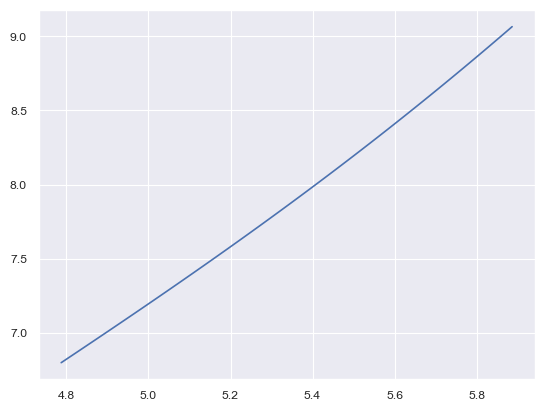

In [32]:
x_values=np.log(df["Temperatur"])
y_values=np.log(sigma) + np.log((df["Temperatur"]+273.15)**4-300**4)
plt.plot(x_values, y_values)
plt.show()